# Food and Fat Consumption EDA

The purpose of this is to perform exploratory data analysis on the COVID-19 Healthy Diet Dataset (source: https://www.kaggle.com/mariaren/covid19-healthy-diet-dataset) and the Worldwide fat production and distribution (source: https://www.kaggle.com/dorbicycle/world-foodfeed-production).

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline

## Data Cleaning

To make the eda process easier, the two datasets will be cleaned and then combined together. 

The first data set contains the percentages of fat consumption for every type of food for every country.

In [48]:
fat_supply = pd.read_csv('Fat_Supply_Quantity_Data.csv')
fat_supply

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,...,17.0831,0.3593,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,0.0000,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,...,9.2443,0.6503,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.0000,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,...,27.3606,0.5145,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,0.0000,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,...,22.4638,0.1231,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,0.0000,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,...,14.4436,0.2469,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),0.0000,16.3261,2.2673,0.0,2.5449,0.6555,0.5707,0.9640,7.0949,...,29.5211,0.1851,25.2,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0,%
166,Vietnam,0.0000,33.2484,3.8238,0.0,3.7155,0.7839,1.1217,0.4079,26.4292,...,5.6211,0.6373,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,%
167,Yemen,0.0000,12.5401,2.0131,0.0,11.5271,0.5514,0.3847,0.2564,8.0010,...,23.6312,0.1667,14.1,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0,%
168,Zambia,0.0783,9.6005,1.6113,0.0,14.3225,0.6266,1.0070,0.1343,4.9010,...,15.2848,0.1567,6.5,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0,%


In [49]:
fat_content_df = fat_supply.drop(columns=['Alcoholic Beverages', 'Miscellaneous','Aquatic Products, Other', 'Fruits - Excluding Wine', 'Spices', 'Starchy Roots', 'Sugar Crops', 'Sugar & Sweeteners', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Unit (all except Population)'])
fat_content_df = fat_content_df.rename(columns = {'Vegetal Products':'Vegetable Products'})

The second dataset contains the amount produced for every type of food for each country, from 1961-2013. Food refers to the amount available as human food. Feed refers to the amount of food available for feeding the livestock and poultry. Since the common characteristic between these two datasets has to do with human consumption, we'll focus on the food elements of the fao dataset.

In [50]:
fao = pd.read_csv('FAO_data.csv', encoding = "ISO-8859-1")
fao

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZWE,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZWE,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [51]:
fao_df1 = fao.drop(columns = ['Area Code', 'latitude', 'longitude'])
fao_df1

,Area Abbreviation,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,1928.0,1904.0,1666.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,183.0,183.0,182.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,76.0,76.0,76.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,237.0,237.0,237.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,210.0,210.0,214.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZWE,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,230.0,232.0,234.0,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZWE,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,27.0,25.0,27.0,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZWE,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,6.0,6.0,6.0,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZWE,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [52]:
fao_df = fao.rename(columns = {'Area':'Country'})
fao_df

,Area Abbreviation,Area Code,Country,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZWE,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZWE,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [53]:
merged_col = fat_content_df.merge(fao_df, how='inner', on='Country')
first_column = merged_col.pop('Area Abbreviation')
merged_col.insert(0, 'Area Abbreviation', first_column)

In [54]:
merged_col

,Area Abbreviation,Country,Animal Products,Animal fats,Cereals - Excluding Beer,Eggs,"Fish, Seafood",Meat,Milk - Excluding Butter,Offals,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,Afghanistan,21.6397,6.2224,8.0353,0.6859,0.0327,6.1244,8.2803,0.3103,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,Afghanistan,21.6397,6.2224,8.0353,0.6859,0.0327,6.1244,8.2803,0.3103,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,Afghanistan,21.6397,6.2224,8.0353,0.6859,0.0327,6.1244,8.2803,0.3103,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,Afghanistan,21.6397,6.2224,8.0353,0.6859,0.0327,6.1244,8.2803,0.3103,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,Afghanistan,21.6397,6.2224,8.0353,0.6859,0.0327,6.1244,8.2803,0.3103,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19880,ZWE,Zimbabwe,10.3796,2.9543,9.7922,0.3682,0.2455,4.5674,2.1040,0.1315,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
19881,ZWE,Zimbabwe,10.3796,2.9543,9.7922,0.3682,0.2455,4.5674,2.1040,0.1315,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
19882,ZWE,Zimbabwe,10.3796,2.9543,9.7922,0.3682,0.2455,4.5674,2.1040,0.1315,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
19883,ZWE,Zimbabwe,10.3796,2.9543,9.7922,0.3682,0.2455,4.5674,2.1040,0.1315,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


## Exploratory Data Analysis

### Regression model of average percentage of fat consumption and obesity for every type of food

#### 1. Animal Products

In [55]:
animal_products_count = merged_col[['Country', 'Animal Products', 'Obesity']].groupby(['Country'], as_index = False).mean()
animal_products_count
animal_prod = animal_products_count.rename(columns = {'Animal Products': 'Average Fat Percent'})
animal_prod_df = animal_prod.sort_values(by = 'Average Fat Percent', ascending = False)

<AxesSubplot:xlabel='Average Fat Percent', ylabel='Obesity'>

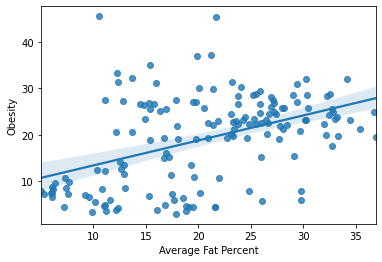

In [56]:
sns.regplot(x = 'Average Fat Percent', y = 'Obesity', data = animal_prod_df)

#### 2. Animal fats

In [57]:
animal_fats_count = merged_col[['Country', 'Animal fats', 'Obesity']].groupby(['Country'], as_index = False).mean()
animal_fats_count
animal_fat = animal_fats_count.rename(columns = {'Animal fats': 'Average Fat Percent'})
animal_fat_df = animal_fat.sort_values(by = 'Average Fat Percent', ascending = False)

<AxesSubplot:xlabel='Average Fat Percent', ylabel='Obesity'>

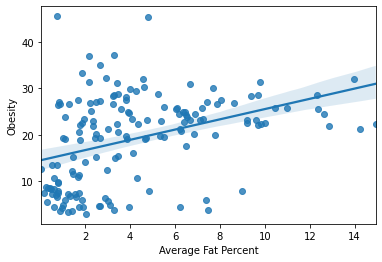

In [58]:
sns.regplot(x = 'Average Fat Percent', y = 'Obesity', data = animal_fat_df)

#### 3. Cereals - Excluding Beer

In [59]:
cereals_count = merged_col[['Country', 'Cereals - Excluding Beer', 'Obesity']].groupby(['Country'], as_index = False).mean()
cereals_count
cereals = cereals_count.rename(columns = {'Cereals - Excluding Beer': 'Average Fat Percent'})
cereals_df = cereals.sort_values(by = 'Average Fat Percent', ascending = False)

<AxesSubplot:xlabel='Average Fat Percent', ylabel='Obesity'>

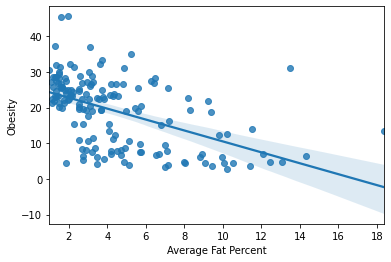

In [60]:
sns.regplot(x = 'Average Fat Percent', y = 'Obesity', data = cereals_df)

#### 4. Eggs

In [61]:
eggs_count = merged_col[['Country', 'Eggs', 'Obesity']].groupby(['Country'], as_index = False).mean()
eggs_count
eggs = eggs_count.rename(columns = {'Eggs': 'Average Fat Percent'})
eggs_df = eggs.sort_values(by = 'Average Fat Percent', ascending = False)

<AxesSubplot:xlabel='Average Fat Percent', ylabel='Obesity'>

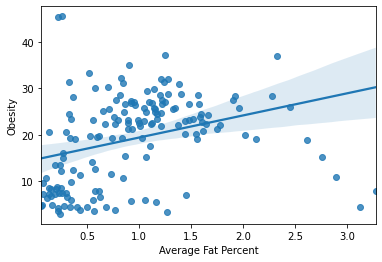

In [62]:
sns.regplot(x = 'Average Fat Percent', y = 'Obesity', data = eggs_df)

#### 5. Fish, Seafood

In [63]:
fish_sea_count = merged_col[['Country', 'Fish, Seafood', 'Obesity']].groupby(['Country'], as_index = False).mean()
fish_sea_count
fish_sea = fish_sea_count.rename(columns = {'Fish, Seafood': 'Average Fat Percent'})
fish_sea_df = fish_sea.sort_values(by = 'Average Fat Percent', ascending = False)

<AxesSubplot:xlabel='Average Fat Percent', ylabel='Obesity'>

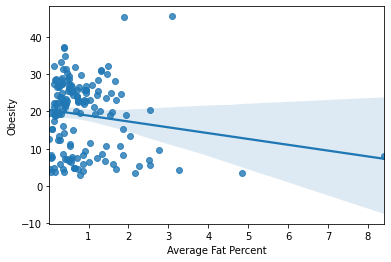

In [64]:
sns.regplot(x = 'Average Fat Percent', y = 'Obesity', data = fish_sea_df)

#### 6. Meat

In [65]:
meat_count = merged_col[['Country', 'Meat', 'Obesity']].groupby(['Country'], as_index = False).mean()
meat_count
meats= meat_count.rename(columns = {'Meat': 'Average Fat Percent'})
meats_df = meats.sort_values(by = 'Average Fat Percent', ascending = False)

<AxesSubplot:xlabel='Average Fat Percent', ylabel='Obesity'>

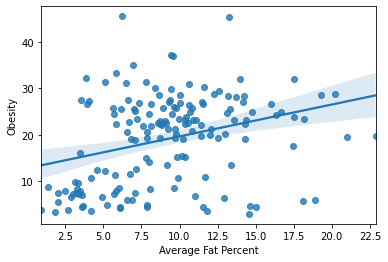

In [66]:
sns.regplot(x = 'Average Fat Percent', y = 'Obesity', data = meats_df)

#### 7. Milk - Excluding Butter

In [67]:
milk_count = merged_col[['Country', 'Milk - Excluding Butter', 'Obesity']].groupby(['Country'], as_index = False).mean()
milk_count
milk = milk_count.rename(columns = {'Milk - Excluding Butter': 'Average Fat Percent'})
milk_df = milk.sort_values(by = 'Average Fat Percent', ascending = False)

<AxesSubplot:xlabel='Average Fat Percent', ylabel='Obesity'>

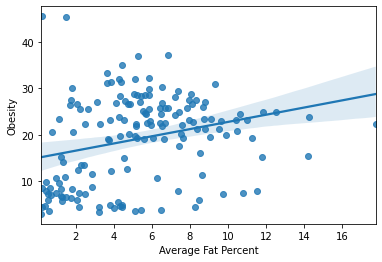

In [68]:
sns.regplot(x = 'Average Fat Percent', y = 'Obesity', data = milk_df)

#### 8. Offals

In [69]:
offals_count = merged_col[['Country', 'Offals', 'Obesity']].groupby(['Country'], as_index = False).mean()
offals_count
offals = offals_count.rename(columns = {'Offals': 'Average Fat Percent'})
offals_df = offals.sort_values(by = 'Average Fat Percent', ascending = False)

<AxesSubplot:xlabel='Average Fat Percent', ylabel='Obesity'>

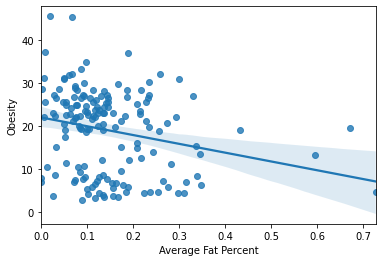

In [70]:
sns.regplot(x = 'Average Fat Percent', y = 'Obesity', data = offals_df)

#### 9. Oilcrops

In [71]:
oilcrops_count = merged_col[['Country', 'Oilcrops', 'Obesity']].groupby(['Country'], as_index = False).mean()
oilcrops_count
oilcrops = oilcrops_count.rename(columns = {'Oilcrops': 'Average Fat Percent'})
oilcrops_df = oilcrops.sort_values(by = 'Average Fat Percent', ascending = False)

<AxesSubplot:xlabel='Average Fat Percent', ylabel='Obesity'>

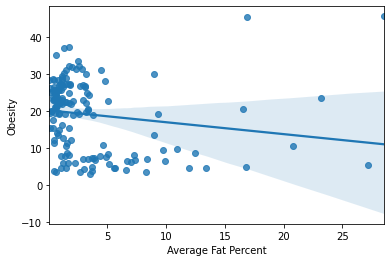

In [72]:
sns.regplot(x = 'Average Fat Percent', y = 'Obesity', data = oilcrops_df)

#### 10. Pulses

In [73]:
pulses_count = merged_col[['Country', 'Pulses', 'Obesity']].groupby(['Country'], as_index = False).mean()
pulses_count
pulses = pulses_count.rename(columns = {'Pulses': 'Average Fat Percent'})
pulses_df = pulses.sort_values(by = 'Average Fat Percent', ascending = False)

<AxesSubplot:xlabel='Average Fat Percent', ylabel='Obesity'>

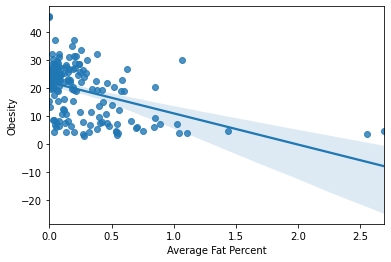

In [74]:
sns.regplot(x = 'Average Fat Percent', y = 'Obesity', data = pulses_df)

#### 11. Stimulants

In [75]:
stimulants_count = merged_col[['Country', 'Stimulants', 'Obesity']].groupby(['Country'], as_index = False).mean()
stimulants_count
stimulants = stimulants_count.rename(columns = {'Stimulants': 'Average Fat Percent'})
stimulants_df = stimulants.sort_values(by = 'Average Fat Percent', ascending = False)

<AxesSubplot:xlabel='Average Fat Percent', ylabel='Obesity'>

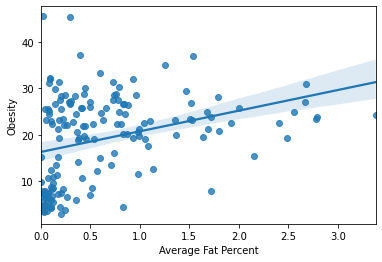

In [76]:
sns.regplot(x = 'Average Fat Percent', y = 'Obesity', data = stimulants_df)

#### 12. Treenuts

In [77]:
treenuts_count = merged_col[['Country', 'Treenuts', 'Obesity']].groupby(['Country'], as_index = False).mean()
treenuts_count
treenuts = treenuts_count.rename(columns = {'Treenuts': 'Average Fat Percent'})
treenuts_df = treenuts.sort_values(by = 'Average Fat Percent', ascending = False)

<AxesSubplot:xlabel='Average Fat Percent', ylabel='Obesity'>

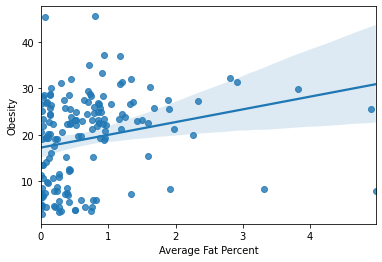

In [78]:
sns.regplot(x = 'Average Fat Percent', y = 'Obesity', data = treenuts_df)

#### 13. Vegetable Products

In [79]:
vegetable_prod_count = merged_col[['Country', 'Vegetable Products', 'Obesity']].groupby(['Country'], as_index = False).mean()
vegetable_prod_count
vegetable_prod = vegetable_prod_count.rename(columns = {'Vegetable Products': 'Average Fat Percent'})
veg_prod_df = vegetable_prod.sort_values(by = 'Average Fat Percent', ascending = False)

<AxesSubplot:xlabel='Average Fat Percent', ylabel='Obesity'>

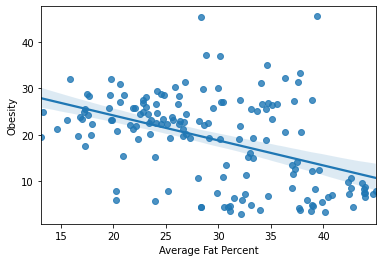

In [80]:
sns.regplot(x = 'Average Fat Percent', y = 'Obesity', data = veg_prod_df)

#### 14. Vegetable Oils

In [81]:
veg_oil_count = merged_col[['Country', 'Vegetable Oils', 'Obesity']].groupby(['Country'], as_index = False).mean()
veg_oil_count
veg_oil = veg_oil_count.rename(columns = {'Vegetable Oils': 'Average Fat Percent'})
veg_oil_df = veg_oil.sort_values(by = 'Average Fat Percent', ascending = False)

<AxesSubplot:xlabel='Average Fat Percent', ylabel='Obesity'>

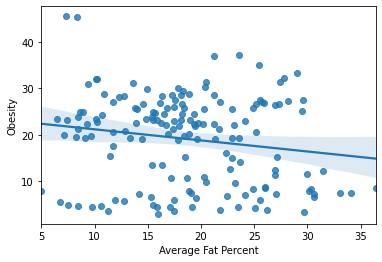

In [82]:
sns.regplot(x = 'Average Fat Percent', y = 'Obesity', data = veg_oil_df)

#### 15. Vegetables

In [83]:
veg_count = merged_col[['Country', 'Vegetables', 'Obesity']].groupby(['Country'], as_index = False).mean()
veg_count
veg = veg_count.rename(columns = {'Vegetables': 'Average Fat Percent'})
veg_df = veg.sort_values(by = 'Average Fat Percent', ascending = False)

<AxesSubplot:xlabel='Average Fat Percent', ylabel='Obesity'>

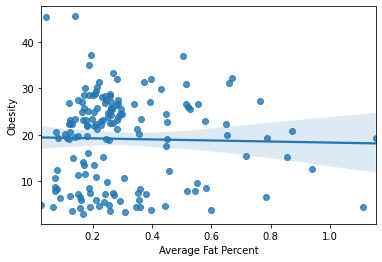

In [84]:
sns.regplot(x = 'Average Fat Percent', y = 'Obesity', data = veg_df)

## Examine the quantity each food produced over the years

The quantities in each of the year columns are measured in 1000 tonnes (e.g 1928.0 = 1928.0 thousand tonnes). 

In [85]:
food_prods = merged_col[['Item', 'Element', 'Y1961', 'Y1962', 'Y1963', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013']]
food_prods

,Item,Element,Y1961,Y1962,Y1963,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Wheat and products,Food,1928.0,1904.0,1666.0,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,Rice (Milled Equivalent),Food,183.0,183.0,182.0,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,Barley and products,Feed,76.0,76.0,76.0,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,Barley and products,Food,237.0,237.0,237.0,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,Maize and products,Feed,210.0,210.0,214.0,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19880,Milk - Excluding Butter,Food,230.0,232.0,234.0,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
19881,"Fish, Seafood",Feed,27.0,25.0,27.0,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
19882,"Fish, Seafood",Food,6.0,6.0,6.0,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
19883,"Aquatic Products, Other",Food,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [86]:
food_only = food_prods[food_prods['Element'] == 'Food']
food_only

,Item,Element,Y1961,Y1962,Y1963,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Wheat and products,Food,1928.0,1904.0,1666.0,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,Rice (Milled Equivalent),Food,183.0,183.0,182.0,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
3,Barley and products,Food,237.0,237.0,237.0,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
5,Maize and products,Food,403.0,403.0,410.0,231.0,67.0,82.0,67.0,69.0,71.0,82.0,73.0,77,76
6,Millet and products,Food,17.0,18.0,19.0,15.0,21.0,11.0,19.0,21.0,18.0,14.0,14.0,14,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19878,Eggs,Food,6.0,6.0,6.0,15.0,18.0,18.0,21.0,22.0,27.0,27.0,24.0,24,25
19880,Milk - Excluding Butter,Food,230.0,232.0,234.0,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
19882,"Fish, Seafood",Food,6.0,6.0,6.0,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
19883,"Aquatic Products, Other",Food,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [87]:
food_and_amt = food_only.drop(columns = ['Element'])
food_and_amt

,Item,Y1961,Y1962,Y1963,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Wheat and products,1928.0,1904.0,1666.0,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,Rice (Milled Equivalent),183.0,183.0,182.0,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
3,Barley and products,237.0,237.0,237.0,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
5,Maize and products,403.0,403.0,410.0,231.0,67.0,82.0,67.0,69.0,71.0,82.0,73.0,77,76
6,Millet and products,17.0,18.0,19.0,15.0,21.0,11.0,19.0,21.0,18.0,14.0,14.0,14,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19878,Eggs,6.0,6.0,6.0,15.0,18.0,18.0,21.0,22.0,27.0,27.0,24.0,24,25
19880,Milk - Excluding Butter,230.0,232.0,234.0,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
19882,"Fish, Seafood",6.0,6.0,6.0,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
19883,"Aquatic Products, Other",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [103]:
food_indx = food_and_amt.set_index('Item')
food_indx

,Y1961,Y1962,Y1963,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Item,,,,,,,,,,,,,
Wheat and products,1928.0,1904.0,1666.0,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
Rice (Milled Equivalent),183.0,183.0,182.0,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
Barley and products,237.0,237.0,237.0,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
Maize and products,403.0,403.0,410.0,231.0,67.0,82.0,67.0,69.0,71.0,82.0,73.0,77,76
Millet and products,17.0,18.0,19.0,15.0,21.0,11.0,19.0,21.0,18.0,14.0,14.0,14,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Eggs,6.0,6.0,6.0,15.0,18.0,18.0,21.0,22.0,27.0,27.0,24.0,24,25
Milk - Excluding Butter,230.0,232.0,234.0,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
"Fish, Seafood",6.0,6.0,6.0,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40


In [88]:
food_avg = food_only[['Item', 'Y1961', 'Y1962', 'Y1963', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013']].groupby(['Item'], as_index = False).mean()
food_avg

,Item,Y1961,Y1962,Y1963,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Alcoholic Beverages,512.082707,528.691729,549.496241,1090.821656,1111.121019,1135.754717,1172.333333,1157.622642,1148.918239,1154.327044,1186.572327,1197.331250,1190.012500
1,Animal fats,70.477612,72.574627,72.470149,110.291139,112.575949,113.662500,115.056250,115.606250,116.887500,118.587500,119.237500,121.776398,123.478261
2,Apples and products,78.343284,95.208955,101.343284,230.525316,240.639241,237.975000,245.937500,246.343750,244.043750,239.643750,233.756250,233.490683,248.807453
3,"Aquatic Animals, Others",0.352941,0.372549,0.382353,1.418033,1.606557,2.500000,1.379032,2.806452,2.508065,2.080645,2.580645,1.790323,1.879032
4,Aquatic Plants,0.919355,0.927419,0.935484,1.108108,1.027027,1.020134,0.932886,0.879195,0.872483,0.845638,0.785235,0.818792,0.785235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Vegetables,861.985075,890.276119,935.783582,2325.227848,2366.677215,2438.725000,2499.075000,2515.418750,2592.806250,2661.306250,2747.081250,2822.490683,2868.285714
111,"Vegetables, Other",683.813433,698.261194,744.582090,1549.012658,1580.088608,1637.343750,1655.493750,1673.287500,1705.537500,1772.537500,1812.025000,1866.844720,1902.596273
112,Wheat and products,814.111940,827.119403,833.000000,2037.943038,2056.702532,2074.462500,2094.300000,2120.493750,2148.593750,2195.968750,2199.900000,2201.900621,2255.875776
113,Wine,146.303030,150.621212,155.734848,140.806452,139.980645,138.216561,137.484076,127.458599,129.178344,129.235669,137.394904,132.968153,132.267516


In [105]:
year_flip = food_avg.T
year_flip

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
Item,Alcoholic Beverages,Animal fats,Apples and products,"Aquatic Animals, Others",Aquatic Plants,"Aquatic Products, Other",Bananas,Barley and products,Beans,Beer,...,"Sweeteners, Other",Tea (including mate),Tomatoes and products,Treenuts,Vegetable Oils,Vegetables,"Vegetables, Other",Wheat and products,Wine,Yams
Y1961,512.083,70.4776,78.3433,0.352941,0.919355,1.17188,120.877,47.4463,51.8915,279.241,...,15.2537,8.21642,119.556,17.188,89.2687,861.985,683.813,814.112,146.303,54.9688
Y1962,528.692,72.5746,95.209,0.372549,0.927419,1.19531,125.315,51.0826,51.7597,287.774,...,16.1269,8.23881,130.128,17.0451,95.5149,890.276,698.261,827.119,150.621,54.0156
Y1963,549.496,72.4701,101.343,0.382353,0.935484,1.21094,130.208,45.0331,55.814,299.421,...,17.5149,8.15672,125.714,17.609,99.1716,935.784,744.582,833,155.735,59.5
Y2004,1090.82,110.291,230.525,1.41803,1.10811,2.22368,359.257,42.3448,92.4685,740.656,...,108.392,20.6392,541.516,51.8599,350.19,2325.23,1549.01,2037.94,140.806,248.014
Y2005,1111.12,112.576,240.639,1.60656,1.02703,2.28947,381.809,39.6552,92.7552,754.828,...,111.044,21.7468,538.815,54.4777,365.215,2366.68,1580.09,2056.7,139.981,242.449
Y2006,1135.75,113.662,237.975,2.5,1.02013,2.99351,401.234,40.5238,99.7517,778.591,...,112.919,22.0188,543.836,58.1824,370.425,2438.72,1637.34,2074.46,138.217,272.754
Y2007,1172.33,115.056,245.938,1.37903,0.932886,2.01948,421.169,39.2789,106.048,806.283,...,113.419,22.7063,560.736,61.6226,379.4,2499.07,1655.49,2094.3,137.484,291.812
Y2008,1157.62,115.606,246.344,2.80645,0.879195,3.11039,441.279,38.5306,104.366,814.119,...,111.15,23.35,552.824,67.1698,385.481,2515.42,1673.29,2120.49,127.459,302.42
Y2009,1148.92,116.888,244.044,2.50806,0.872483,2.86364,449.805,43.9796,105.317,802.094,...,108.944,22.375,606.164,67.3522,396.706,2592.81,1705.54,2148.59,129.178,352.493


In [115]:
year_flip.columns = year_flip.loc['Item']
year_flip

Item,Alcoholic Beverages,Animal fats,Apples and products,"Aquatic Animals, Others",Aquatic Plants,"Aquatic Products, Other",Bananas,Barley and products,Beans,Beer,...,"Sweeteners, Other",Tea (including mate),Tomatoes and products,Treenuts,Vegetable Oils,Vegetables,"Vegetables, Other",Wheat and products,Wine,Yams
Item,Alcoholic Beverages,Animal fats,Apples and products,"Aquatic Animals, Others",Aquatic Plants,"Aquatic Products, Other",Bananas,Barley and products,Beans,Beer,...,"Sweeteners, Other",Tea (including mate),Tomatoes and products,Treenuts,Vegetable Oils,Vegetables,"Vegetables, Other",Wheat and products,Wine,Yams
Y1961,512.083,70.4776,78.3433,0.352941,0.919355,1.17188,120.877,47.4463,51.8915,279.241,...,15.2537,8.21642,119.556,17.188,89.2687,861.985,683.813,814.112,146.303,54.9688
Y1962,528.692,72.5746,95.209,0.372549,0.927419,1.19531,125.315,51.0826,51.7597,287.774,...,16.1269,8.23881,130.128,17.0451,95.5149,890.276,698.261,827.119,150.621,54.0156
Y1963,549.496,72.4701,101.343,0.382353,0.935484,1.21094,130.208,45.0331,55.814,299.421,...,17.5149,8.15672,125.714,17.609,99.1716,935.784,744.582,833,155.735,59.5
Y2004,1090.82,110.291,230.525,1.41803,1.10811,2.22368,359.257,42.3448,92.4685,740.656,...,108.392,20.6392,541.516,51.8599,350.19,2325.23,1549.01,2037.94,140.806,248.014
Y2005,1111.12,112.576,240.639,1.60656,1.02703,2.28947,381.809,39.6552,92.7552,754.828,...,111.044,21.7468,538.815,54.4777,365.215,2366.68,1580.09,2056.7,139.981,242.449
Y2006,1135.75,113.662,237.975,2.5,1.02013,2.99351,401.234,40.5238,99.7517,778.591,...,112.919,22.0188,543.836,58.1824,370.425,2438.72,1637.34,2074.46,138.217,272.754
Y2007,1172.33,115.056,245.938,1.37903,0.932886,2.01948,421.169,39.2789,106.048,806.283,...,113.419,22.7063,560.736,61.6226,379.4,2499.07,1655.49,2094.3,137.484,291.812
Y2008,1157.62,115.606,246.344,2.80645,0.879195,3.11039,441.279,38.5306,104.366,814.119,...,111.15,23.35,552.824,67.1698,385.481,2515.42,1673.29,2120.49,127.459,302.42
Y2009,1148.92,116.888,244.044,2.50806,0.872483,2.86364,449.805,43.9796,105.317,802.094,...,108.944,22.375,606.164,67.3522,396.706,2592.81,1705.54,2148.59,129.178,352.493


In [116]:
drop_col = year_flip.drop(['Item'])
drop_col

Item,Alcoholic Beverages,Animal fats,Apples and products,"Aquatic Animals, Others",Aquatic Plants,"Aquatic Products, Other",Bananas,Barley and products,Beans,Beer,...,"Sweeteners, Other",Tea (including mate),Tomatoes and products,Treenuts,Vegetable Oils,Vegetables,"Vegetables, Other",Wheat and products,Wine,Yams
Y1961,512.083,70.4776,78.3433,0.352941,0.919355,1.17188,120.877,47.4463,51.8915,279.241,...,15.2537,8.21642,119.556,17.188,89.2687,861.985,683.813,814.112,146.303,54.9688
Y1962,528.692,72.5746,95.209,0.372549,0.927419,1.19531,125.315,51.0826,51.7597,287.774,...,16.1269,8.23881,130.128,17.0451,95.5149,890.276,698.261,827.119,150.621,54.0156
Y1963,549.496,72.4701,101.343,0.382353,0.935484,1.21094,130.208,45.0331,55.814,299.421,...,17.5149,8.15672,125.714,17.609,99.1716,935.784,744.582,833,155.735,59.5
Y2004,1090.82,110.291,230.525,1.41803,1.10811,2.22368,359.257,42.3448,92.4685,740.656,...,108.392,20.6392,541.516,51.8599,350.19,2325.23,1549.01,2037.94,140.806,248.014
Y2005,1111.12,112.576,240.639,1.60656,1.02703,2.28947,381.809,39.6552,92.7552,754.828,...,111.044,21.7468,538.815,54.4777,365.215,2366.68,1580.09,2056.7,139.981,242.449
Y2006,1135.75,113.662,237.975,2.5,1.02013,2.99351,401.234,40.5238,99.7517,778.591,...,112.919,22.0188,543.836,58.1824,370.425,2438.72,1637.34,2074.46,138.217,272.754
Y2007,1172.33,115.056,245.938,1.37903,0.932886,2.01948,421.169,39.2789,106.048,806.283,...,113.419,22.7063,560.736,61.6226,379.4,2499.07,1655.49,2094.3,137.484,291.812
Y2008,1157.62,115.606,246.344,2.80645,0.879195,3.11039,441.279,38.5306,104.366,814.119,...,111.15,23.35,552.824,67.1698,385.481,2515.42,1673.29,2120.49,127.459,302.42
Y2009,1148.92,116.888,244.044,2.50806,0.872483,2.86364,449.805,43.9796,105.317,802.094,...,108.944,22.375,606.164,67.3522,396.706,2592.81,1705.54,2148.59,129.178,352.493
Y2010,1154.33,118.588,239.644,2.08065,0.845638,2.49351,474.688,41.5918,117.938,802.56,...,116.888,22.9312,583.484,67.327,401.225,2661.31,1772.54,2195.97,129.236,356.667


In [132]:
reset_indx = drop_col.reset_index()
reset_indx['index'] = reset_indx['index'].apply(lambda x: x.replace('Y', ''))
reset_indx

Item,index,Alcoholic Beverages,Animal fats,Apples and products,"Aquatic Animals, Others",Aquatic Plants,"Aquatic Products, Other",Bananas,Barley and products,Beans,...,"Sweeteners, Other",Tea (including mate),Tomatoes and products,Treenuts,Vegetable Oils,Vegetables,"Vegetables, Other",Wheat and products,Wine,Yams
0,1961,512.083,70.4776,78.3433,0.352941,0.919355,1.17188,120.877,47.4463,51.8915,...,15.2537,8.21642,119.556,17.188,89.2687,861.985,683.813,814.112,146.303,54.9688
1,1962,528.692,72.5746,95.209,0.372549,0.927419,1.19531,125.315,51.0826,51.7597,...,16.1269,8.23881,130.128,17.0451,95.5149,890.276,698.261,827.119,150.621,54.0156
2,1963,549.496,72.4701,101.343,0.382353,0.935484,1.21094,130.208,45.0331,55.814,...,17.5149,8.15672,125.714,17.609,99.1716,935.784,744.582,833,155.735,59.5
3,2004,1090.82,110.291,230.525,1.41803,1.10811,2.22368,359.257,42.3448,92.4685,...,108.392,20.6392,541.516,51.8599,350.19,2325.23,1549.01,2037.94,140.806,248.014
4,2005,1111.12,112.576,240.639,1.60656,1.02703,2.28947,381.809,39.6552,92.7552,...,111.044,21.7468,538.815,54.4777,365.215,2366.68,1580.09,2056.7,139.981,242.449
5,2006,1135.75,113.662,237.975,2.5,1.02013,2.99351,401.234,40.5238,99.7517,...,112.919,22.0188,543.836,58.1824,370.425,2438.72,1637.34,2074.46,138.217,272.754
6,2007,1172.33,115.056,245.938,1.37903,0.932886,2.01948,421.169,39.2789,106.048,...,113.419,22.7063,560.736,61.6226,379.4,2499.07,1655.49,2094.3,137.484,291.812
7,2008,1157.62,115.606,246.344,2.80645,0.879195,3.11039,441.279,38.5306,104.366,...,111.15,23.35,552.824,67.1698,385.481,2515.42,1673.29,2120.49,127.459,302.42
8,2009,1148.92,116.888,244.044,2.50806,0.872483,2.86364,449.805,43.9796,105.317,...,108.944,22.375,606.164,67.3522,396.706,2592.81,1705.54,2148.59,129.178,352.493
9,2010,1154.33,118.588,239.644,2.08065,0.845638,2.49351,474.688,41.5918,117.938,...,116.888,22.9312,583.484,67.327,401.225,2661.31,1772.54,2195.97,129.236,356.667


In [138]:
reset_indx['Year'] = reset_indx['index']
year_indx = reset_indx.set_index('Year')

Seeing how there's a huge list of various food products, we'll choose the food products that we used for the regression plots previously in order to maintain consistency. 

In [140]:
food_prods = year_indx[['Vegetables', 'Vegetable Oils', 'Nuts and products', 'Stimulants', 'Pulses', 'Oilcrops', 'Offals', 'Milk - Excluding Butter','Meat', 'Fish, Seafood', 'Eggs', 'Cereals - Excluding Beer', 'Animal fats']]
food_prods

Item,Vegetables,Vegetable Oils,Nuts and products,Stimulants,Pulses,Oilcrops,Offals,Milk - Excluding Butter,Meat,"Fish, Seafood",Eggs,Cereals - Excluding Beer,Animal fats
Year,,,,,,,,,,,,,
1961,861.985,89.2687,17.188,38.4925,147.194,82.0752,26.8582,1389.54,415.313,146.507,78.0224,1949.05,70.4776
1962,890.276,95.5149,17.0451,40.9478,141.388,86.218,28.097,1399,430.261,150.746,80.2015,2011.34,72.5746
1963,935.784,99.1716,17.609,41.9851,144.664,87.4586,28.5522,1437.3,442.955,157.866,81.6045,2019.41,72.4701
2004,2325.23,350.19,51.8599,87.9367,220.605,202.16,59.3608,3020.08,1084.09,413.968,188.747,4340.46,110.291
2005,2366.68,365.215,54.4777,90.7722,223.777,210.077,59.6392,3098.35,1098.48,423.076,191.405,4400.14,112.576
2006,2438.72,370.425,58.1824,90.225,233.648,217.722,59.7375,3139.09,1118.11,436.106,196.056,4431.19,113.662
2007,2499.07,379.4,61.6226,93.5375,252.616,224.468,60.9813,3230.82,1161,449.988,200.613,4500.37,115.056
2008,2515.42,385.481,67.1698,94.7375,240.358,214.608,59.4375,3282.66,1183.15,457.469,202.769,4577.99,115.606
2009,2592.81,396.706,67.3522,90.6375,258.478,216.044,59.0938,3346.89,1189.22,460.594,206.906,4625.6,116.888


<Figure size 3240x720 with 0 Axes>

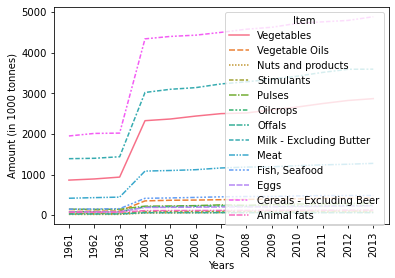

<Figure size 3240x720 with 0 Axes>

In [162]:
food_prods = food_prods.astype(float)
food_prods
plot1 = sns.lineplot(data=food_prods)
plot1.set(xlabel='Years', ylabel='Amount (in 1000 tonnes)')
plt.xticks(rotation=90)
plt.figure(figsize=(45,10))